# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import numpy as np

# Data

In [2]:
df = pd.read_csv('raw/trafegoall.csv')

In [3]:
df

,DTM_UTC,DTM_LOCAL,TEMATICA,COD_PARAMETRO,PARAMETRO,NR_ESTACAO,COD_SENSOR,slo_id,LOCAL,LATITUDE,...,SLO_FROMTO,SMO_FROMTO_TOTAL,SMO_FROMTO_L,SMO_FROMTO_M,SMO_FROMTO_P,SLO_TOFROM,SMO_TOFROM_TOTAL,SMO_TOFROM_L,SMO_TOFROM_M,SMO_TOFROM_P
0,2021-07-14 23:00:00.0,2021-07-15 00:00:00.0,CT,0TMD,TMD,69,CT0TMD0069,10102638,Calçada de Carriche,38.783654,...,Odivelas - Lumiar,0,0,0,0,Lumiar - Odivelas,0,0,0,0
1,2021-07-14 23:00:00.0,2021-07-15 00:00:00.0,CT,0TMD,TMD,76,CT0TMD0076,10102649,Restauradores - Avenida da Liberdade,38.716510,...,Marques de Pombal - Baixa,0,0,0,0,Baixa - Marques de Pombal,0,0,0,0
2,2021-07-15 10:00:00.0,2021-07-15 11:00:00.0,CT,0TMD,TMD,27,CT0TMD0027,10102596,Marquês de Pombal - Alameda Edgar Cardoso,38.725979,...,NaN,0,0,0,0,NaN,0,0,0,0
3,2021-07-15 11:00:00.0,2021-07-15 12:00:00.0,CT,0TMD,TMD,34,CT0TMD0034,10102604,Avenida da Républica,38.735931,...,Saldanha - Marques de Pombal,0,0,0,0,Marques de Pombal - Saldanha,0,0,0,0
4,2021-07-15 11:00:00.0,2021-07-15 12:00:00.0,CT,0TMD,TMD,69,CT0TMD0069,10102638,Calçada de Carriche,38.783654,...,Odivelas - Lumiar,0,0,0,0,Lumiar - Odivelas,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79343,2024-01-15 19:00:00.0,2024-01-15 19:00:00.0,CT,0VTH,VTH,1027,CT0VTH1027,11746982,Marquês de Pombal - Alameda Edgar Cardoso,38.725979,...,Viaduto Eng. Duarte Pacheco - Amoreiras,3120,2773,158,189,Amoreiras - Viaduto Eng. Duarte Pacheco,2239,1604,602,33
79344,2024-01-15 20:00:00.0,2024-01-15 20:00:00.0,CT,0VTH,VTH,1027,CT0VTH1027,11746982,Marquês de Pombal - Alameda Edgar Cardoso,38.725979,...,Viaduto Eng. Duarte Pacheco - Amoreiras,2296,2148,91,57,Amoreiras - Viaduto Eng. Duarte Pacheco,1888,1339,524,25
79345,2024-01-15 21:00:00.0,2024-01-15 21:00:00.0,CT,0VTH,VTH,1027,CT0VTH1027,11746982,Marquês de Pombal - Alameda Edgar Cardoso,38.725979,...,Viaduto Eng. Duarte Pacheco - Amoreiras,1489,1406,47,36,Amoreiras - Viaduto Eng. Duarte Pacheco,1242,884,347,11
79346,2024-01-15 22:00:00.0,2024-01-15 22:00:00.0,CT,0VTH,VTH,1027,CT0VTH1027,11746982,Marquês de Pombal - Alameda Edgar Cardoso,38.725979,...,Viaduto Eng. Duarte Pacheco - Amoreiras,1284,1229,38,17,Amoreiras - Viaduto Eng. Duarte Pacheco,980,704,261,15


In [4]:
df.LOCAL.unique()

array(['Calçada de Carriche', 'Restauradores - Avenida da Liberdade',
       'Marquês de Pombal - Alameda Edgar Cardoso',
       'Avenida da Républica', 'Av. Dr. Luis Gomes / Av. De Berlim',
       'Avenida de Berlim', 'Avenida das Forças Armadas'], dtype=object)

In [5]:
gdf = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.LONGITUDE, df.LATITUDE),
    crs = 'epsg:4326'
)

In [6]:
gdf.shape

(79348, 23)

In [7]:
gdf.DTM_LOCAL = pd.to_datetime(gdf.DTM_LOCAL)

In [8]:
# Almost Hourly data
for k in gdf.DTM_LOCAL.unique()[10:]:
    print(k)
for k in gdf.DTM_LOCAL.unique()[-10:]:
    print(k)

2021-07-17 12:00:00
2021-07-17 23:00:00
2021-07-18 00:00:00
2021-07-18 11:00:00
2021-07-18 12:00:00
2021-07-18 23:00:00
2021-07-19 00:00:00
2021-07-19 11:00:00
2021-07-19 12:00:00
2021-07-19 17:00:00
2021-07-20 00:00:00
2021-07-20 11:00:00
2021-07-20 12:00:00
2021-07-20 23:00:00
2021-07-21 00:00:00
2021-07-21 11:00:00
2021-07-21 12:00:00
2021-07-21 23:00:00
2021-07-22 00:00:00
2021-07-22 11:00:00
2021-07-22 12:00:00
2021-07-22 23:00:00
2021-07-23 00:00:00
2021-07-23 11:00:00
2021-07-23 12:00:00
2021-07-23 23:00:00
2021-07-24 00:00:00
2021-07-24 11:00:00
2021-07-24 12:00:00
2021-07-24 23:00:00
2021-07-25 00:00:00
2021-07-25 11:00:00
2021-07-25 12:00:00
2021-07-25 23:00:00
2021-07-26 00:00:00
2021-07-26 11:00:00
2021-07-26 12:00:00
2021-07-26 23:00:00
2021-07-27 00:00:00
2021-07-27 11:00:00
2021-07-27 12:00:00
2021-07-27 23:00:00
2021-07-28 00:00:00
2021-07-28 11:00:00
2021-07-28 12:00:00
2021-07-28 23:00:00
2021-07-29 00:00:00
2021-07-29 11:00:00
2021-07-29 12:00:00
2021-07-29 23:00:00


In [9]:
gdf.DTM_LOCAL.unique().size

19153

In [10]:
directions = gdf[['COD_SENSOR', 'SLO_FROMTO', 'SLO_TOFROM']].drop_duplicates()

In [11]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from temporal_agg import hourly_to_aadt

In [12]:
gdf = gdf.set_index(['COD_SENSOR', 'DTM_LOCAL'])[[
    'SMO_FROMTO_TOTAL',
    'SMO_FROMTO_P',
    'SMO_TOFROM_TOTAL',
    'SMO_TOFROM_P'
    
    ]].groupby("COD_SENSOR").resample("h", level="DTM_LOCAL").sum()


In [13]:

gdf['year'] = gdf.index.get_level_values(1).year
l_df = []
for year in range(2021, 2025): 
    print(year)
    sub, _, _ = hourly_to_aadt(gdf[gdf.year == year], 'COD_SENSOR', 'DTM_LOCAL', [ 'SMO_FROMTO_TOTAL',
    'SMO_FROMTO_P',
    'SMO_TOFROM_TOTAL',
    'SMO_TOFROM_P'])
    
    sub['year'] = year
    l_df.append(sub)

gdf = pd.concat(l_df)

2021
Hourly capture rate is 8.7 %
Daily capture rate is 47.0 %
2022
Hourly capture rate is 39.9 %
Daily capture rate is 100.0 %
2023
Hourly capture rate is 33.2 %
Daily capture rate is 83.3 %
2024
Hourly capture rate is 1.6 %
Daily capture rate is 94.7 %


In [14]:
gdf = gdf[gdf.SMO_FROMTO_TOTAL !=0].set_index('year', append=True).sort_index()

In [15]:
gdf.columns

Index(['SMO_FROMTO_TOTAL', 'SMO_FROMTO_P', 'SMO_TOFROM_TOTAL', 'SMO_TOFROM_P',
       'SMO_FROMTO_TOTAL_AAWT', 'SMO_FROMTO_P_AAWT', 'SMO_TOFROM_TOTAL_AAWT',
       'SMO_TOFROM_P_AAWT'],
      dtype='object')

In [16]:
gdf = pd.concat(
    [directions.set_index(['COD_SENSOR'])[['SLO_FROMTO']].join(
    gdf[['SMO_FROMTO_TOTAL', 'SMO_FROMTO_P', 
       'SMO_FROMTO_TOTAL_AAWT', 'SMO_FROMTO_P_AAWT',]].rename(
           columns = {'SMO_FROMTO_TOTAL' : 'AADT', 'SMO_FROMTO_P' : 'TR_AADT', 
       'SMO_FROMTO_TOTAL_AAWT' : 'AAWT', 'SMO_FROMTO_P_AAWT' : 'TR_AAWT'}
           ),
    how = 'inner'
).rename(columns = {'SLO_FROMTO':'direction'}).set_index('direction', append=True),
     directions.set_index('COD_SENSOR')[['SLO_TOFROM']].join(
    gdf[['SMO_TOFROM_TOTAL', 'SMO_TOFROM_P',
      'SMO_TOFROM_TOTAL_AAWT',
       'SMO_TOFROM_P_AAWT']].rename(
           columns = {'SMO_TOFROM_TOTAL' : 'AADT', 'SMO_TOFROM_P' : 'TR_AADT', 
       'SMO_TOFROM_TOTAL_AAWT' : 'AAWT', 'SMO_TOFROM_P_AAWT' : 'TR_AAWT'}
           ),
    how = 'inner'
).rename(columns = {'SLO_TOFROM':'direction'}).set_index('direction', append=True)
    ], 
    axis = 0
).sort_index()
gdf

AADT  \
COD_SENSOR year direction                                               
CT0VTH0034 2021 Marques de Pombal - Saldanha              3599.015625   
                Saldanha - Marques de Pombal              3893.984375   
           2022 Marques de Pombal - Saldanha              5922.243836   
                Saldanha - Marques de Pombal              6050.627397   
           2023 Marques de Pombal - Saldanha              2768.854671   
                Saldanha - Marques de Pombal              2590.044983   
CT0VTH0069 2021 Lumiar - Odivelas                        15939.578125   
                Odivelas - Lumiar                        14463.562500   
           2022 Lumiar - Odivelas                        28471.619178   
                Odivelas - Lumiar                        26169.991781   
           2023 Lumiar - Odivelas                        22060.558904   
                Odivelas - Lumiar                        20501.736986   
           2024 Lumiar - Odivelas                        28315.000000   
                Odivelas - Lumiar                        25910.928571   
CT0VTH0076 2021 Baixa - Marques de Pombal                 4335.921875   
                Marques de Pombal - Baixa                 1218.296875   
           2022 Baixa - Marques de Pombal                 8912.931507   
                Marques de Pombal - Baixa                 2534.512329   
           2023 Baixa - Marques de Pombal                 6052.334247   
                Marques de Pombal - Baixa                 5267.915068   
           2024 Baixa - Marques de Pombal                 6302.642857   
                Marques de Pombal - Baixa                 5046.428571   
CT0VTH1027 2021 Amoreiras - Viaduto Eng. Duarte Pacheco  11135.888889   
                Viaduto Eng. Duarte Pacheco - Amoreiras   9683.037037   
           2022 Amoreiras - Viaduto Eng. Duarte Pacheco  40139.879452   
                Viaduto Eng. Duarte Pacheco - Amoreiras  34291.827397   
           2023 Amoreiras - Viaduto Eng. Duarte Pacheco  33564.997260   
                Viaduto Eng. Duarte Pacheco - Amoreiras  29290.347945   
           2024 Amoreiras - Viaduto Eng. Duarte Pacheco  40803.000000   
                Viaduto Eng. Duarte Pacheco - Amoreiras  35412.133333   
CT0VTH1034 2023 Entrecampos - Sete Rios                  18319.160000   
                Sete Rios - Entrecampos                   9851.906667   
           2024 Entrecampos - Sete Rios                  18551.714286   
                Sete Rios - Entrecampos                   8512.000000   
CT0VTH1079 2021 Aeroporto - Parque das Naçoes             3493.793651   
                Parque das Naçoes - Aeroporto             4200.000000   
           2022 Aeroporto - Parque das Naçoes            12376.739726   
                Parque das Naçoes - Aeroporto            16128.917808   
           2023 Aeroporto - Parque das Naçoes            10197.309589   
                Parque das Naçoes - Aeroporto            14036.682192   
           2024 Aeroporto - Parque das Naçoes            10655.214286   
                Parque das Naçoes - Aeroporto            13885.642857   

                                                             TR_AADT  \
COD_SENSOR year direction                                              
CT0VTH0034 2021 Marques de Pombal - Saldanha              357.062500   
                Saldanha - Marques de Pombal              836.843750   
           2022 Marques de Pombal - Saldanha              586.528767   
                Saldanha - Marques de Pombal             1059.131507   
           2023 Marques de Pombal - Saldanha              189.498270   
                Saldanha - Marques de Pombal              324.273356   
CT0VTH0069 2021 Lumiar - Odivelas                         757.921875   
                Odivelas - Lumiar                         578.625000   
           2022 Lumiar - Odivelas                        1274.334247   
                Odivelas - Lumiar                        102

In [17]:
# Here there are only 6 sensors and the locations are not so great so we will encode
# LineStrings to match directions and make it more accurate
# One sensor hasstrange location so only 5 sensors remaining
ref = gpd.read_file('raw/referential_lisbon_custom.geojson')

In [18]:
jf = gdf.join(ref.set_index(['COD_SENSOR', 'direction']),
         on = ['COD_SENSOR', 'direction'],
         how = 'inner', rsuffix = '_r')

In [19]:
jf

AADT      TR_AADT  \
COD_SENSOR year direction                                                  
CT0VTH0034 2021 Marques de Pombal - Saldanha    3599.015625   357.062500   
                Saldanha - Marques de Pombal    3893.984375   836.843750   
           2022 Marques de Pombal - Saldanha    5922.243836   586.528767   
                Saldanha - Marques de Pombal    6050.627397  1059.131507   
           2023 Marques de Pombal - Saldanha    2768.854671   189.498270   
                Saldanha - Marques de Pombal    2590.044983   324.273356   
CT0VTH0069 2021 Lumiar - Odivelas              15939.578125   757.921875   
                Odivelas - Lumiar              14463.562500   578.625000   
           2022 Lumiar - Odivelas              28471.619178  1274.334247   
                Odivelas - Lumiar              26169.991781  1028.635616   
           2023 Lumiar - Odivelas              22060.558904  1241.594521   
                Odivelas - Lumiar              20501.736986   906.969863   
           2024 Lumiar - Odivelas              28315.000000  1834.928571   
                Odivelas - Lumiar              25910.928571  1203.714286   
CT0VTH0076 2021 Baixa - Marques de Pombal       4335.921875   234.562500   
                Marques de Pombal - Baixa       1218.296875   393.234375   
           2022 Baixa - Marques de Pombal       8912.931507   475.726027   
                Marques de Pombal - Baixa       2534.512329   760.172603   
           2023 Baixa - Marques de Pombal       6052.334247   404.819178   
                Marques de Pombal - Baixa       5267.915068  1170.863014   
           2024 Baixa - Marques de Pombal       6302.642857   436.071429   
                Marques de Pombal - Baixa       5046.428571   841.642857   
CT0VTH1034 2023 Entrecampos - Sete Rios        18319.160000   878.080000   
                Sete Rios - Entrecampos         9851.906667   520.893333   
           2024 Entrecampos - Sete Rios        18551.714286   841.785714   
                Sete Rios - Entrecampos         8512.000000   337.500000   
CT0VTH1079 2021 Aeroporto - Parque das Naçoes   3493.793651   263.634921   
                Parque das Naçoes - Aeroporto   4200.000000   112.142857   
           2022 Aeroporto - Parque das Naçoes  12376.739726  1199.767123   
                Parque das Naçoes - Aeroporto  16128.917808   477.216438   
           2023 Aeroporto - Parque das Naçoes  10197.309589  1002.819178   
                Parque das Naçoes - Aeroporto  14036.682192   382.728767   
           2024 Aeroporto - Parque das Naçoes  10655.214286  1021.428571   
                Parque das Naçoes - Aeroporto  13885.642857   349.642857   

                                                       AAWT      TR_AAWT  \
COD_SENSOR year direction                                                  
CT0VTH0034 2021 Marques de Pombal - Saldanha    3401.978261   348.978261   
                Saldanha - Marques de Pombal    3916.217391   844.086957   
           2022 Marques de Pombal - Saldanha    6225.292308   647.453846   
                Saldanha - Marques de Pombal    6613.953846  1175.211538   
           2023 Marques de Pombal - Saldanha    2947.116505   221.791262   
                Saldanha - Marques de Pombal    2787.815534   362.097087   
CT0VTH0069 2021 Lumiar - Odivelas              17179.456522   875.282609   
                Odivelas - Lumiar              15829.260870   725.000000   
           2022 Lumiar - Odivelas              30252.888462  1495.003846   
                Odivelas - Lumiar              28193.776923  1291.907692   
           2023 Lumiar - Odivelas              22828.669231  1401.003846   
                Odivelas - Lumiar              21880.476923  1137.807692   
           2024 Lumiar - Odivelas              29103.800000  2056.700000   
                Odivelas - Lumiar              27245.200000  1507.800000   
CT0VTH0076 2021 Baixa - Marques de Pombal       4680.782609   223.891304   
                Marques de

Text(0.5, 0, 'Years')

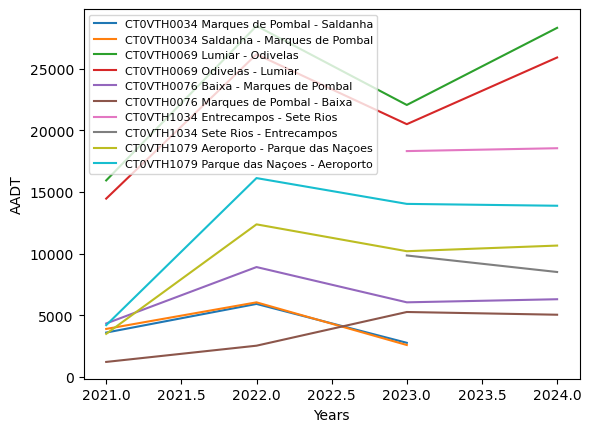

In [20]:
for k, z in jf.index.droplevel(1).drop_duplicates():
    plt.plot(jf.loc[k, slice(None), z].AADT, label = k + ' ' + z)
    
plt.legend(fontsize = 8)
plt.ylabel('AADT')
plt.xlabel('Years')

In [21]:
jf.columns

Index(['AADT', 'TR_AADT', 'AAWT', 'TR_AAWT', 'name', 'geometry'], dtype='object')

In [22]:
jf.reset_index(level = 2, inplace=True)

In [23]:
jf.rename(
    columns = {
        'name':'raw_name',
        'direction' : 'raw_direction'
    }, inplace=True
)

In [24]:
jf['raw_oneway'] = True

In [25]:
jf = gpd.GeoDataFrame(
    jf,
    geometry = 'geometry',
    crs = 'epsg:4326'
)

## OLD

In [9]:
gdf['year'] = gdf.DTM_LOCAL.apply(lambda x : x.year)
gdf['weekday'] = gdf.DTM_LOCAL.apply(lambda x : x.weekday())

In [10]:
gdf.columns

Index(['DTM_UTC', 'DTM_LOCAL', 'TEMATICA', 'COD_PARAMETRO', 'PARAMETRO',
       'NR_ESTACAO', 'COD_SENSOR', 'slo_id', 'LOCAL', 'LATITUDE', 'LONGITUDE',
       'UNIDADE', 'SLO_FROMTO', 'SMO_FROMTO_TOTAL', 'SMO_FROMTO_L',
       'SMO_FROMTO_M', 'SMO_FROMTO_P', 'SLO_TOFROM', 'SMO_TOFROM_TOTAL',
       'SMO_TOFROM_L', 'SMO_TOFROM_M', 'SMO_TOFROM_P', 'geometry', 'year',
       'weekday'],
      dtype='object')

In [11]:
gdf = gdf.groupby(['COD_SENSOR', 'year']).agg(
    SMO_FROMTO_TOTAL = ('SMO_FROMTO_TOTAL', 'sum'),
    SMO_FROMTO_L = ('SMO_FROMTO_L','sum'),
    SMO_FROMTO_M = ('SMO_FROMTO_M','sum'),
    SMO_FROMTO_P = ('SMO_FROMTO_P', 'sum' ),
    SMO_TOFROM_TOTAL = ('SMO_TOFROM_TOTAL','sum'),
    SMO_TOFROM_L = ('SMO_TOFROM_L', 'sum'),
    SMO_TOFROM_M = ('SMO_TOFROM_M', 'sum'),
    SMO_TOFROM_P = ('SMO_TOFROM_P', 'sum'),
    # Keep the first 
    direction_from_to = ('SLO_FROMTO', lambda x : x.iloc[0]),
    direction_to_from = ('SLO_TOFROM',  lambda x : x.iloc[0]),
    name = ('LOCAL', lambda x : x.iloc[0]),
    geometry = ('geometry', lambda x : x.iloc[0])
)

In [12]:
# Remove 0 and get daily values
gdf = gdf[gdf.SMO_FROMTO_TOTAL != 0] 

In [13]:
# Divide by the number of days to get AADT
for k in [
    'SMO_FROMTO_TOTAL', 'SMO_FROMTO_L', 'SMO_FROMTO_M', 'SMO_FROMTO_P',
       'SMO_TOFROM_TOTAL', 'SMO_TOFROM_L', 'SMO_TOFROM_M', 'SMO_TOFROM_P'
]:
    gdf[k] = gdf[k]/365

In [14]:
gdf = gpd.GeoDataFrame(
    gdf, # get daily,
    geometry = 'geometry',
    crs = 'epsg:4326'
)

In [15]:
# Verification
gdf['SMO_FROMTO_TOTAL'] - (gdf[['SMO_FROMTO_L', 'SMO_FROMTO_M', 'SMO_FROMTO_P']].sum(axis = 1))

COD_SENSOR  year
CT0VTH0034  2021    0.000000e+00
            2022    0.000000e+00
            2023    0.000000e+00
CT0VTH0069  2021   -4.547474e-13
            2022   -3.637979e-12
            2023    0.000000e+00
            2024    0.000000e+00
CT0VTH0076  2021    0.000000e+00
            2022    0.000000e+00
            2023    1.102192e+01
            2024    1.586301e+00
CT0VTH1027  2021    2.273737e-13
            2022    0.000000e+00
            2023    1.369863e-02
            2024    2.273737e-13
CT0VTH1034  2023    0.000000e+00
            2024    5.684342e-14
CT0VTH1079  2021   -1.136868e-13
            2022   -1.818989e-12
            2023    2.739726e-02
            2024    0.000000e+00
dtype: float64

In [16]:
gdf['SMO_TOFROM_TOTAL'] - (gdf[['SMO_TOFROM_L', 'SMO_TOFROM_M', 'SMO_TOFROM_P']].sum(axis = 1))

COD_SENSOR  year
CT0VTH0034  2021    0.000000e+00
            2022    0.000000e+00
            2023    4.547474e-13
CT0VTH0069  2021   -4.547474e-13
            2022    0.000000e+00
            2023    7.671233e-02
            2024    2.739726e-03
CT0VTH0076  2021    1.136868e-13
            2022   -1.818989e-12
            2023    2.739726e-03
            2024    0.000000e+00
CT0VTH1027  2021    0.000000e+00
            2022    7.275958e-12
            2023    2.109589e-01
            2024    8.219178e-03
CT0VTH1034  2023    5.479452e-03
            2024   -1.136868e-13
CT0VTH1079  2021   -1.136868e-13
            2022    1.818989e-12
            2023    1.095890e-02
            2024    0.000000e+00
dtype: float64

In [17]:
gdf.shape

(21, 12)

In [18]:
# Here there are only 6 sensors and the locations are not so great so we will encode
# LineStrings to match directions and make it more accurate
# One sensor hasstrange location so only 5 sensors remaining
ref = gpd.read_file('raw/referential_lisbon_custom.geojson')

In [19]:
gdf.columns

Index(['SMO_FROMTO_TOTAL', 'SMO_FROMTO_L', 'SMO_FROMTO_M', 'SMO_FROMTO_P',
       'SMO_TOFROM_TOTAL', 'SMO_TOFROM_L', 'SMO_TOFROM_M', 'SMO_TOFROM_P',
       'direction_from_to', 'direction_to_from', 'name', 'geometry'],
      dtype='object')

In [20]:
gdf_fromto = gdf[['SMO_FROMTO_TOTAL', 'SMO_FROMTO_L', 'SMO_FROMTO_M', 'SMO_FROMTO_P', 'direction_from_to','name'
    ]]

gdf_fromto.columns = ['SMO_TOTAL', 'SMO_L', 'SMO_M', 'SMO_P', 'direction','name']

gdf_tofrom = gdf[['SMO_TOFROM_TOTAL', 'SMO_TOFROM_L', 'SMO_TOFROM_M', 'SMO_TOFROM_P', 'direction_to_from', 'name' 
]]

gdf_tofrom.columns = ['SMO_TOTAL', 'SMO_L', 'SMO_M', 'SMO_P', 'direction','name']

gdf = pd.concat([gdf_fromto, gdf_tofrom], axis = 0)

In [21]:
gdf = gdf.set_index('direction', append=True).sort_index()
gdf

SMO_TOTAL  \
COD_SENSOR year direction                                               
CT0VTH0034 2021 Marques de Pombal - Saldanha               631.060274   
                Saldanha - Marques de Pombal               682.780822   
           2022 Marques de Pombal - Saldanha              5922.243836   
                Saldanha - Marques de Pombal              6050.627397   
           2023 Marques de Pombal - Saldanha              2212.923288   
                Saldanha - Marques de Pombal              2069.405479   
CT0VTH0069 2021 Lumiar - Odivelas                         2794.884932   
                Odivelas - Lumiar                         2536.076712   
           2022 Lumiar - Odivelas                        28471.619178   
                Odivelas - Lumiar                        26169.991781   
           2023 Lumiar - Odivelas                        22060.558904   
                Odivelas - Lumiar                        20501.736986   
           2024 Lumiar - Odivelas                         1101.978082   
                Odivelas - Lumiar                         1006.380822   
CT0VTH0076 2021 Baixa - Marques de Pombal                  760.271233   
                Marques de Pombal - Baixa                  213.619178   
           2022 Baixa - Marques de Pombal                 8912.931507   
                Marques de Pombal - Baixa                 2534.512329   
           2023 Baixa - Marques de Pombal                 6052.334247   
                Marques de Pombal - Baixa                 5267.915068   
           2024 Baixa - Marques de Pombal                  249.027397   
                Marques de Pombal - Baixa                  200.512329   
CT0VTH1027 2021 Amoreiras - Viaduto Eng. Duarte Pacheco   1647.501370   
                Viaduto Eng. Duarte Pacheco - Amoreiras   1432.558904   
           2022 Amoreiras - Viaduto Eng. Duarte Pacheco  40139.879452   
                Viaduto Eng. Duarte Pacheco - Amoreiras  34291.827397   
           2023 Amoreiras - Viaduto Eng. Duarte Pacheco  33564.997260   
                Viaduto Eng. Duarte Pacheco - Amoreiras  29290.347945   
           2024 Amoreiras - Viaduto Eng. Duarte Pacheco   1676.835616   
                Viaduto Eng. Duarte Pacheco - Amoreiras   1455.293151   
CT0VTH1034 2023 Entrecampos - Sete Rios                   3802.852055   
                Sete Rios - Entrecampos                   2054.090411   
           2024 Entrecampos - Sete Rios                    714.290411   
                Sete Rios - Entrecampos                    327.893151   
CT0VTH1079 2021 Aeroporto - Parque das Naçoes              603.038356   
                Parque das Naçoes - Aeroporto              724.931507   
           2022 Aeroporto - Parque das Naçoes            12376.739726   
                Parque das Naçoes - Aeroporto            16128.917808   
           2023 Aeroporto - Parque das Naçoes            10197.309589   
                Parque das Naçoes - Aeroporto            14036.682192   
           2024 Aeroporto - Parque das Naçoes              416.854795   
                Parque das Naçoes - Aeroporto              543.052055   

                                                                SMO_L  \
COD_SENSOR year direction                                               
CT0VTH0034 2021 Marques de Pombal - Saldanha               531.347945   
                Saldanha - Marques de Pombal               347.512329   
           2022 Marques de Pombal - Saldanha              4908.317808   
                Saldanha - Marques de Pombal              3412.789041   
           2023 Marques de Pombal - Saldanha              1866.728767   
                Saldanha - Marques de Pombal              1374.276712   
CT0VTH0069 2021 Lumiar - Odivelas                         2128.780822   
                Odivelas - Lumiar                         2240.846575   
           2022 Lumiar - Odivelas                        22114.219178   
                Odivelas - Lumiar           

In [22]:
jf = gdf.join(ref.set_index(['COD_SENSOR', 'direction']),
         on = ['COD_SENSOR', 'direction'],
         how = 'inner', rsuffix = '_r')

In [23]:
(jf.name == jf.name_r).sum() == jf.shape[0]

True

In [24]:
jf.columns

Index(['SMO_TOTAL', 'SMO_L', 'SMO_M', 'SMO_P', 'name', 'name_r', 'geometry'], dtype='object')

In [25]:
jf.rename(
    columns = {
        'SMO_TOTAL' : 'AADT',
        'SMO_P' : 'TR_AADT',
        'name':'Street_name'
    }, inplace=True
)

In [26]:
jf = gpd.GeoDataFrame(
    jf,
    geometry = 'geometry',
    crs = 'epsg:4326'
)

# Map matching with OSM

In [26]:
from map_matching_OSM import lines_matching

In [27]:
jf.drop_duplicates(subset = 'geometry').droplevel(1).reset_index()

,COD_SENSOR,raw_direction,AADT,TR_AADT,AAWT,TR_AAWT,raw_name,geometry,raw_oneway
0,CT0VTH0034,Marques de Pombal - Saldanha,3599.015625,357.062500,3401.978261,348.978261,Avenida da Républica,"LINESTRING (-9.14521 38.73558, -9.1453 38.73595)",True
1,CT0VTH0034,Saldanha - Marques de Pombal,3893.984375,836.843750,3916.217391,844.086957,Avenida da Républica,"LINESTRING (-9.14546 38.73595, -9.14538 38.73558)",True
2,CT0VTH0069,Lumiar - Odivelas,15939.578125,757.921875,17179.456522,875.282609,Calçada de Carriche,"LINESTRING (-9.16683 38.78369, -9.16729 38.78409)",True
3,CT0VTH0069,Odivelas - Lumiar,14463.562500,578.625000,15829.260870,725.000000,Calçada de Carriche,"LINESTRING (-9.16744 38.78401, -9.16698 38.78361)",True
4,CT0VTH0076,Baixa - Marques de Pombal,4335.921875,234.562500,4680.782609,223.891304,Restauradores - Avenida da Liberdade,"LINESTRING (-9.14233 38.71652, -9.14255 38.71677)",True
5,CT0VTH0076,Marques de Pombal - Baixa,1218.296875,393.234375,1160.760870,381.478261,Restauradores - Avenida da Liberdade,"LINESTRING (-9.14259 38.71676, -9.14237 38.71649)",True
6,CT0VTH1034,Entrecampos - Sete Rios,18319.160000,878.080000,19745.037736,1079.283019,Avenida das Forças Armadas,"LINESTRING (-9.15498 38.74737, -9.15582 38.74724)",True
7,CT0VTH1034,Sete Rios - Entrecampos,9851.906667,520.893333,10576.811321,628.698113,Avenida das Forças Armadas,"LINESTRING (-9.1554 38.7472, -9.15486 38.74729)",True
8,CT0VTH1079,Aeroporto - Parque das Naçoes,3493.793651,263.634921,3613.000000,282.333333,Avenida de Berlim,"LINESTRING (-9.12236 38.76944, -9.12129 38.76933)",True
9,CT0VTH1079,Parque das Naçoes - Aeroporto,4200.000000,112.142857,4334.977778,125.933333,Avenida de Berlim,"LINESTRING (-9.12128 38.76938, -9.12235 38.76949)",True


In [28]:
gdf = lines_matching(jf.drop_duplicates(subset = 'geometry').droplevel(1).reset_index(), name = 'Lisbon, Portugal')

Main graph loaded
Node 247122211 not reachable from 1573490212
Node 635781571 not reachable from 1573490212
Node 788533248 not reachable from 1573490212
Node 517133257 not reachable from 321693464
Node 635781571 not reachable from 321693464
Node 290031410 not reachable from 321693464
Node 290031410 not reachable from 321693464
Node 919969707 not reachable from 321693464
Node 788533248 not reachable from 321693464
Node 635781571 not reachable from 767118386
Node 788533248 not reachable from 767118386
Node 635781571 not reachable from 1185449505
Node 788533248 not reachable from 1185449505
Node 263056184 not reachable from 517133257
Node 272921763 not reachable from 517133257
Node 253568652 not reachable from 517133257
Node 300188621 not reachable from 517133257
Node 263056184 not reachable from 247122211
Node 272921763 not reachable from 247122211
Node 253568652 not reachable from 247122211
Node 300188621 not reachable from 247122211
Node 300188621 not reachable from 635781571
Node 2630

In [29]:
gdf.set_index(['COD_SENSOR', 'raw_direction'])[['raw_name', 'osm_name']]#.drop_duplicates()

raw_name  \
COD_SENSOR raw_direction                                                         
CT0VTH0034 Marques de Pombal - Saldanha                   Avenida da Républica   
           Saldanha - Marques de Pombal                   Avenida da Républica   
CT0VTH0069 Lumiar - Odivelas                               Calçada de Carriche   
           Odivelas - Lumiar                               Calçada de Carriche   
CT0VTH0076 Baixa - Marques de Pombal      Restauradores - Avenida da Liberdade   
           Marques de Pombal - Baixa      Restauradores - Avenida da Liberdade   
CT0VTH1034 Entrecampos - Sete Rios                  Avenida das Forças Armadas   
           Sete Rios - Entrecampos                  Avenida das Forças Armadas   
CT0VTH1079 Aeroporto - Parque das Naçoes                     Avenida de Berlim   
           Parque das Naçoes - Aeroporto                     Avenida de Berlim   

                                                            osm_name  
COD_SENSOR raw_direction                                              
CT0VTH0034 Marques de Pombal - Saldanha         Avenida da República  
           Saldanha - Marques de Pombal         Avenida da República  
CT0VTH0069 Lumiar - Odivelas                     Calçada de Carriche  
           Odivelas - Lumiar                     Calçada de Carriche  
CT0VTH0076 Baixa - Marques de Pombal            Avenida da Liberdade  
           Marques de Pombal - Baixa            Avenida da Liberdade  
CT0VTH1034 Entrecampos - Sete Rios        Avenida das Forças Armadas  
           Sete Rios - Entrecampos        Avenida das Forças Armadas  
CT0VTH1079 Aeroporto - Parque das Naçoes           Avenida de Berlim  
           Parque das Naçoes - Aeroporto           Avenida de Berlim

In [30]:
jf = jf.set_index('raw_direction', append=True).join(
    gdf.set_index(['COD_SENSOR', 'raw_direction'])[['osm_name', 'osm_type', 'osm_lanes', 'osm_oneway', 'osm_maxspeed', 'osmid']],
    on = ['COD_SENSOR', 'raw_direction'],
    how = 'inner'
)

In [31]:
jf.reset_index(level = 2, inplace=True)

In [33]:
from validate_dataset import validate_dataset

jf = validate_dataset(jf)

Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of low outliers for AADT: 0
Number of high outliers for AADT: 0


# Final saving

In [34]:
# 2021 and 2024 are truncated, only save the others
for year in [2021, 2022, 2023, 2024] :
    sub = jf.loc[slice(None), year, :]
    
    sub[['AADT', 'TR_AADT', 'AAWT', 'TR_AAWT', 'geometry', 'raw_name', 'raw_oneway', 'raw_direction', 'osm_name',  'osm_type', 'osm_lanes', 'osm_oneway', 'osm_maxspeed', 'osmid',]].to_file(
        f'treated/Lisbon_AADT_{year}.geojson', index=False
    )